In [5]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/admin/Desktop/telecom_churn.csv")

In [4]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,High
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,Medium
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,Low
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,Low
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,High


In [7]:
df.shape

(3333, 12)

In [10]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
Income              object
dtype: object

In [ ]:
## Converting Income variable from object to binary using one hot encoding 

In [33]:
df = pd.get_dummies(df, columns=['Income']) 
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income_High,Income_Low,Income_Medium
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,1,0,0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0,0,1
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0,1,0
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0,1,0
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,1,0,0


In [34]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income_High,Income_Low,Income_Medium
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294,0.325833,0.343534,0.330633
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840,0.468755,0.474959,0.470512
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000,0.000000,0.000000,0.000000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000,0.000000,0.000000,0.000000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000,1.000000,1.000000,1.000000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

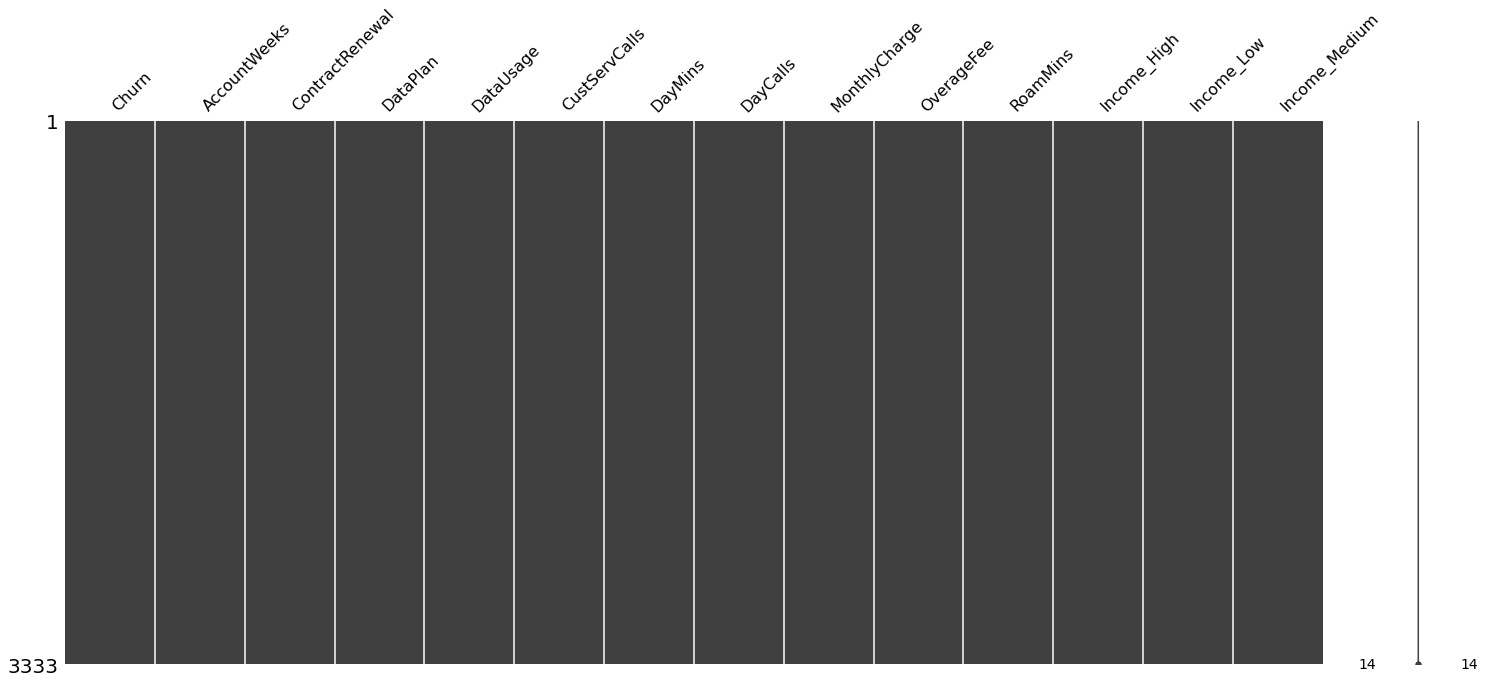

In [35]:
import missingno as msno
import matplotlib
%matplotlib inline
msno.matrix(df)

## No Missing Values

In [36]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Income_High', 'Income_Low', 'Income_Medium'],
      dtype='object')

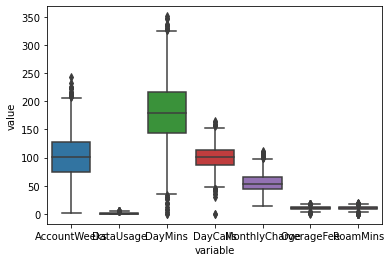

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="variable", y="value", data=pd.melt(df[['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]))
plt.show()

## The data has some outliers

# Building the Decision Tree model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV

In [37]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Income_High', 'Income_Low', 'Income_Medium'],
      dtype='object')

In [38]:
y=df['Churn']
X=df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Income_High', 'Income_Low', 'Income_Medium']]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [43]:
clf_dt = DecisionTreeClassifier(max_depth=3,criterion='gini')

clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)

Model accuracy :  0.9100449775112444
[[573   5]
 [ 55  34]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       578
           1       0.87      0.38      0.53        89

    accuracy                           0.91       667
   macro avg       0.89      0.69      0.74       667
weighted avg       0.91      0.91      0.89       667

0.9100449775112444


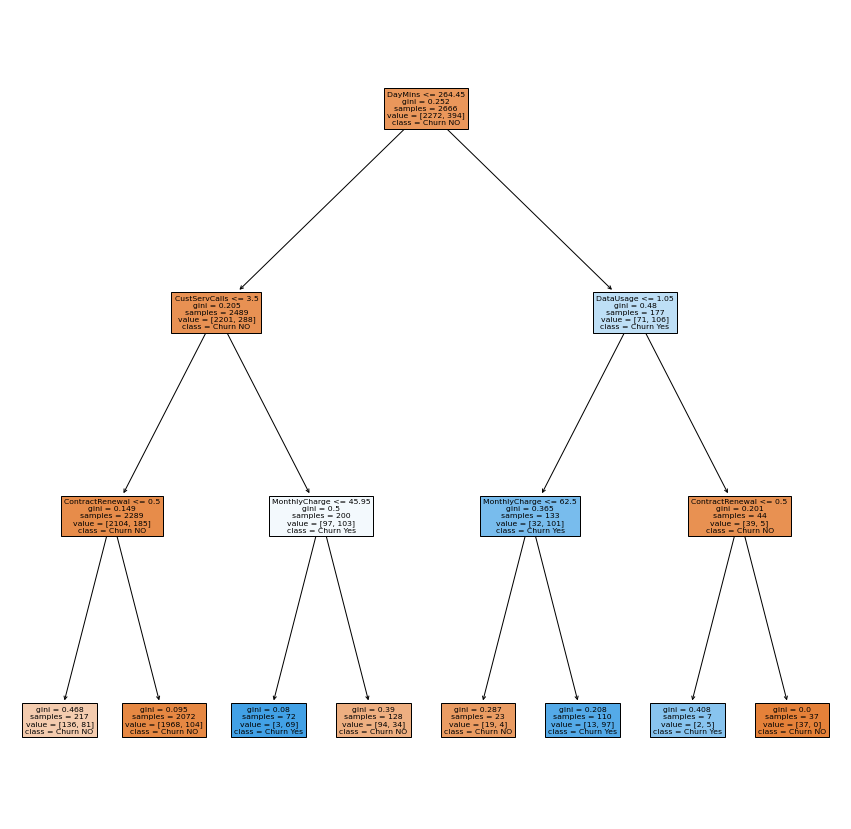

In [45]:
plt.figure(figsize=[15,15])

print('Model accuracy : ', score)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=['Churn NO','Churn Yes'])
plt.show()

In [46]:
one=np.sum(y_train)
zero=len(y_train)-np.sum(y_train)
print(one)
print(zero)

394
2272


In [93]:
weights = {0:1, 1:1}
model = DecisionTreeClassifier(class_weight=weights,criterion='entropy',max_depth= 5,max_features=0.8,min_samples_leaf=4,min_samples_split=12)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[536  42]
 [ 20  69]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       578
           1       0.62      0.78      0.69        89

    accuracy                           0.91       667
   macro avg       0.79      0.85      0.82       667
weighted avg       0.92      0.91      0.91       667

0.9070464767616192


In [47]:
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'max_features':[0.5,0.6,0.7,0.8,0.9,1],
    'min_samples_leaf': [3,4,5],
    'min_samples_split' : [8,10,12],
    'criterion' :['gini','entropy']
}

In [48]:
clf_dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf_dt, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1, verbose = 2)

In [49]:
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.9,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [50]:
grid_search.best_score_

0.7352439364635868

In [51]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[567  11]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       578
           1       0.85      0.69      0.76        89

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.94      0.94      0.94       667

0.9415292353823088


In [63]:
y_pred=(best_grid.predict_proba(X_test)[:,1]>=0.20).astype('int')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[520  58]
 [ 15  74]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       578
           1       0.56      0.83      0.67        89

    accuracy                           0.89       667
   macro avg       0.77      0.87      0.80       667
weighted avg       0.92      0.89      0.90       667

0.8905547226386806


## Oversampling and undersampling

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [120]:
over=SMOTE(sampling_strategy=0.3,random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=42)

In [88]:
X_res, y_res = over.fit_resample(X_train, y_train)
X_res, y_res = under.fit_resample(X_res, y_res)

In [89]:
one=np.sum(y_res)
zero=len(y_res)-np.sum(y_res)
print(one)
print(zero)
print(one/zero)

681
1362
0.5


In [90]:
grid_search.fit(X_res, y_res)

grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.6,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [91]:
grid_search.best_score_

0.797052648757684

In [92]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[548  30]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       578
           1       0.69      0.75      0.72        89

    accuracy                           0.92       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.93      0.92      0.92       667

0.9220389805097451


In [110]:
y_pred=(best_grid.predict_proba(X_test)[:,1]>=0.30).astype('int')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[452 126]
 [ 10  79]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       578
           1       0.39      0.89      0.54        89

    accuracy                           0.80       667
   macro avg       0.68      0.83      0.70       667
weighted avg       0.90      0.80      0.82       667

0.7961019490254873


In [ ]:
weights = {0:1, 1:1}
model = DecisionTreeClassifier(class_weight=weights,criterion='entropy',max_depth= 7,max_features=0.6,min_samples_leaf=4,min_samples_split=10)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

## Oversampling and Undersampling in other proportion

In [103]:
over=SMOTE(sampling_strategy=0.5,random_state=42)
under = RandomUnderSampler(sampling_strategy=1,random_state=42)
X_res, y_res = over.fit_resample(X_train, y_train)
X_res, y_res = under.fit_resample(X_res, y_res)
one=np.sum(y_res)
zero=len(y_res)-np.sum(y_res)
print(one)
print(zero)
print(one/zero)

1136
1136
1.0


In [104]:
grid_search.fit(X_res, y_res)

grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [105]:
grid_search.best_score_

0.8810166236067853

In [106]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[535  43]
 [ 19  70]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       578
           1       0.62      0.79      0.69        89

    accuracy                           0.91       667
   macro avg       0.79      0.86      0.82       667
weighted avg       0.92      0.91      0.91       667

0.9070464767616192


# Giving more importance to the Positive Class

In [112]:
y_pred=(best_grid.predict_proba(X_test)[:,1]>=0.35).astype('int')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[464 114]
 [ 13  76]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       578
           1       0.40      0.85      0.54        89

    accuracy                           0.81       667
   macro avg       0.69      0.83      0.71       667
weighted avg       0.90      0.81      0.83       667

0.8095952023988006


In [116]:
weights = {0:1, 1:1}
model = DecisionTreeClassifier(class_weight=weights,criterion='gini',max_depth= 7,max_features=0.7,min_samples_leaf=3,min_samples_split=10)
model.fit(X_res,y_res)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[526  52]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       578
           1       0.58      0.82      0.68        89

    accuracy                           0.90       667
   macro avg       0.78      0.87      0.81       667
weighted avg       0.92      0.90      0.90       667

0.8980509745127436


In [118]:
importance = model.feature_importances_
importance

array([0.02019961, 0.25772226, 0.07640742, 0.02368411, 0.18355228,
       0.20955216, 0.01204683, 0.09872147, 0.03709825, 0.01071151,
       0.01502763, 0.02594286, 0.02933361])

In [119]:
feature_imp = pd.Series(model.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

ContractRenewal    0.257722
DayMins            0.209552
CustServCalls      0.183552
MonthlyCharge      0.098721
DataPlan           0.076407
OverageFee         0.037098
Income_Medium      0.029334
Income_Low         0.025943
DataUsage          0.023684
AccountWeeks       0.020200
Income_High        0.015028
DayCalls           0.012047
RoamMins           0.010712
dtype: float64